# Brief Info

In [1]:
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

img_rows, img_cols = 28,28
input_shape = (img_rows, img_cols)

X = np.array(data_train.iloc[:,1:])
y = to_categorical(np.array(data_train.iloc[:,0]))

# Here we split validation data to optimize classifier during training
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=13)

# Test data
X_test = np.array(data_test.iloc[:,1:])
y_test = to_categorical(np.array(data_test.iloc[:,0]))

X_train = X_train.reshape(X_train.shape[0], img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28,28

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(img_rows,img_cols,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adam(),
             metrics=['accuracy'])


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

## Training

In [4]:
history = model.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(X_val,y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
188/188 [==============================] - 8s 17ms/step - loss: 1.1652 - accuracy: 0.5718 - val_loss: 0.4955 - val_accuracy: 0.8182
Epoch 2/50
188/188 [==============================] - 3s 16ms/step - loss: 0.5827 - accuracy: 0.7829 - val_loss: 0.3982 - val_accuracy: 0.8562
Epoch 3/50
188/188 [==============================] - 3s 14ms/step - loss: 0.4444 - accuracy: 0.8337 - val_loss: 0.3568 - val_accuracy: 0.8719
Epoch 4/50
188/188 [==============================] - 3s 14ms/step - loss: 0.3896 - accuracy: 0.8586 - val_loss: 0.3194 - val_accuracy: 0.8822
Epoch 5/50
188/188 [==============================] - 3s 14ms/step - loss: 0.3581 - accuracy: 0.8683 - val_loss: 0.3053 - val_accuracy: 0.8892
Epoch 6/50
188/188 [==============================] - 3s 14ms/step - loss: 0.3493 - accuracy: 0.8731 - val_loss: 0.2940 - val_accuracy: 0.8915
Epoch 7/50
188/188 [==============================] - 3s 14ms/step - loss: 0.3290 - accuracy: 0.8798 - val_loss: 0.2897 - val_accuracy: 0.8941

In [5]:
print('Test loss : ',score[0])
print('Test accuracy : ', score[1])

Test loss :  0.1942911595106125
Test accuracy :  0.9273999929428101


## Results

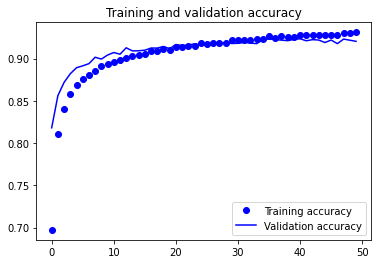

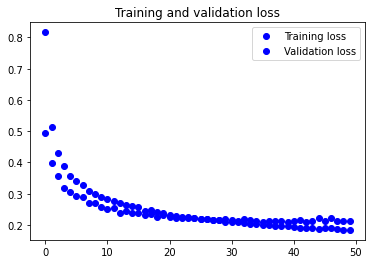

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Classification Report

In [7]:
# get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [8]:
# get the indices to be plotted
y_true = data_test.iloc[:,0]

correct = np.nonzero(predicted_classes==y_true[0])
incorrect = np.nonzero(predicted_classes!=y_true[0])

In [9]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.88      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.89      0.90      1000
     Class 3       0.93      0.94      0.93      1000
     Class 4       0.88      0.90      0.89      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.79      0.78      0.78      1000
     Class 7       0.93      0.99      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



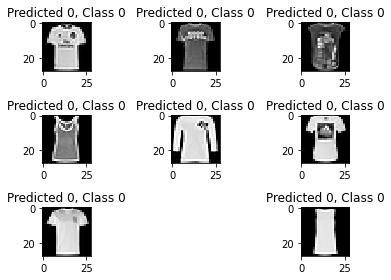

In [11]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

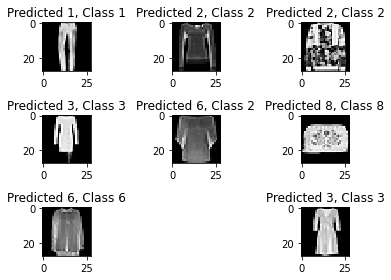

In [13]:
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

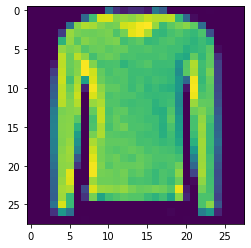

In [14]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

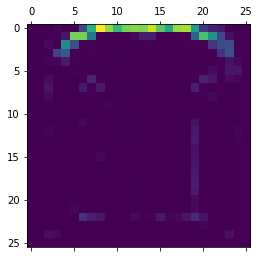

In [15]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(model.input, layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


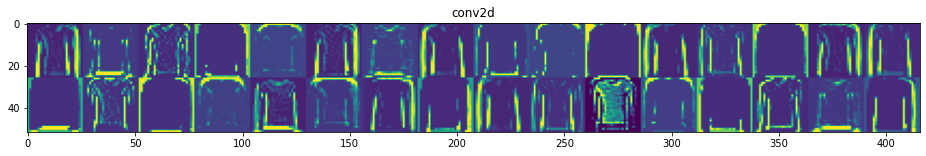

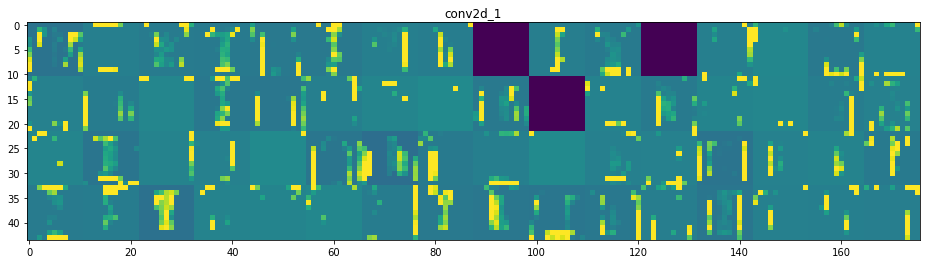

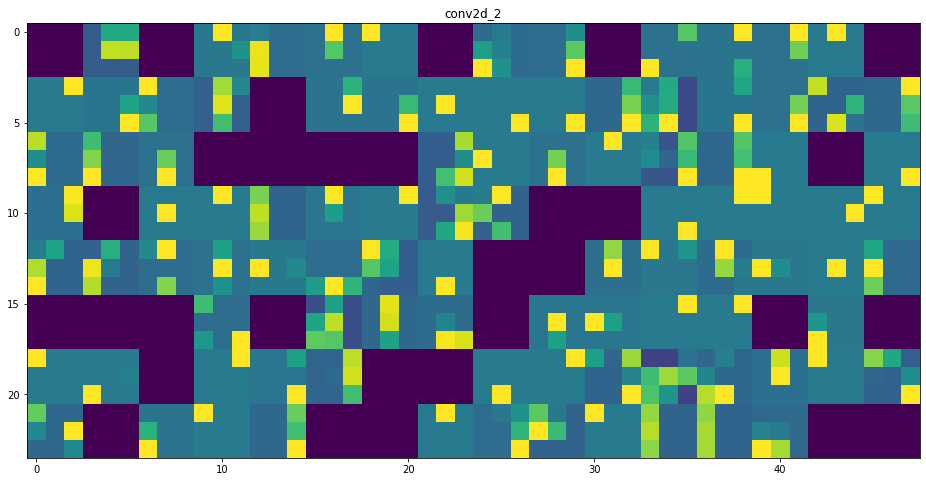

In [16]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')